In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
% matplotlib inline

# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [ ]:
import io
import pandas as pd
data=pd.read_excel('https://github.com/gaby9902/AGR-JMA-JDG/blob/master/ESGData1.xlsx?raw=true', index_col=0)  

In [ ]:
data.head()

,Company Name,Country of Headquarters,Ticker,TRBC Economic Sector Name,TRBC Industry Name,TRBC Business Sector Name,TRBC Activity Name,FY-7 EBITDA,FY-6 EBITDA,FY-5 EBITDA,...,FY-1 FA,FY-0 FA,FY-3 INV,FY-2 INV,FY-1 INV,FY-0 INV,FY-3 PBR,FY-2 PBR,FY-1 PBR,FY-0 PBR
Identifier (RIC),,,,,,,,,,,,,,,,,,,,,
AESGENER.SN,AES Gener SA,Chile,AESGENER CI Equity,Utilities,Independent Power Producers,Utilities,Independent Power Producers (NEC),735.429000,658.341000,620.911000,...,6480.8140,6313.107500,136.2350,155.1570,186.3580,153.496250,1.2355,1.0719,0.8894,1.067175
AGRO.BA,Agrometal SAI,Argentina,AGRO AR Equity,Industrials,Heavy Machinery & Vehicles,Industrial Goods,Agricultural Machinery,11.041237,3.549060,3.447945,...,12.3188,7.003775,5.0050,13.5778,6.2468,7.458650,8.6754,4.2925,2.0329,4.823325
AGUASA.SN,Aguas Andinas SA,Chile,AGUAS/A CI Equity,Utilities,Water & Related Utilities,Utilities,Water & Related Utilities (NEC),438.436647,505.877096,473.118212,...,2081.5463,2037.770650,4.9385,6.3786,5.2398,5.373850,3.3649,3.8792,3.6575,3.695200
ALEATIC.MX,Aleatica SAB de CV,Mexico,ALEATIC* MM Equity,Industrials,Highways & Rail Tracks,Transportation,Highway Operators,574.876814,833.642201,1182.030772,...,2.1239,132.484175,0.0000,0.0000,0.0000,0.000000,0.5158,0.7408,0.5141,0.627875
ALFAA.MX,Alfa SAB de CV,Mexico,ALFAA MM Equity,Industrials,Industrial Conglomerates,Industrial Conglomerates,Industrial Conglomerates,2096.282707,2118.251928,1823.589257,...,8032.0866,7658.949750,1982.3577,2251.9782,2633.5461,2212.559925,1.7367,1.5740,1.6104,1.623775


In [ ]:
data['FY-0 LR']=data['FY-0 WACC %D']/data['FY-0 WACC %E']
data['FY-1 LR']=data['FY-1 WACC %D']/data['FY-1 WACC %E']
data['FY-2 LR']=data['FY-2 WACC %D']/data['FY-2 WACC %E']
data['FY-3 LR']=data['FY-3 WACC %D']/data['FY-3 WACC %E']
data['FY-4 LR']=data['FY-4 WACC %D']/data['FY-4 WACC %E']
data['FY-5 LR']=data['FY-5 WACC %D']/data['FY-5 WACC %E']
data['FY-6 LR']=data['FY-6 WACC %D']/data['FY-6 WACC %E']
data['FY-7 LR']=data['FY-7 WACC %D']/data['FY-7 WACC %E']

In [ ]:
data.head()

,Company Name,Country of Headquarters,Ticker,TRBC Economic Sector Name,TRBC Industry Name,TRBC Business Sector Name,TRBC Activity Name,FY-7 EBITDA,FY-6 EBITDA,FY-5 EBITDA,...,FY-1 PBR,FY-0 PBR,FY-0 LR,FY-1 LR,FY-2 LR,FY-3 LR,FY-4 LR,FY-5 LR,FY-6 LR,FY-7 LR
Identifier (RIC),,,,,,,,,,,,,,,,,,,,,
AESGENER.SN,AES Gener SA,Chile,AESGENER CI Equity,Utilities,Independent Power Producers,Utilities,Independent Power Producers (NEC),735.429000,658.341000,620.911000,...,0.8894,1.067175,2.033276,1.506611,1.334486,1.356488,0.749334,NaN,NaN,NaN
AGRO.BA,Agrometal SAI,Argentina,AGRO AR Equity,Industrials,Heavy Machinery & Vehicles,Industrial Goods,Agricultural Machinery,11.041237,3.549060,3.447945,...,2.0329,4.823325,0.454216,0.285045,0.109515,0.066283,0.708022,NaN,NaN,NaN
AGUASA.SN,Aguas Andinas SA,Chile,AGUAS/A CI Equity,Utilities,Water & Related Utilities,Utilities,Water & Related Utilities (NEC),438.436647,505.877096,473.118212,...,3.6575,3.695200,0.435321,0.451329,0.359860,0.342868,0.386116,NaN,NaN,NaN
ALEATIC.MX,Aleatica SAB de CV,Mexico,ALEATIC* MM Equity,Industrials,Highways & Rail Tracks,Transportation,Highway Operators,574.876814,833.642201,1182.030772,...,0.5141,0.627875,1.121903,0.757520,0.837777,0.766811,0.697277,NaN,NaN,NaN
ALFAA.MX,Alfa SAB de CV,Mexico,ALFAA MM Equity,Industrials,Industrial Conglomerates,Industrial Conglomerates,Industrial Conglomerates,2096.282707,2118.251928,1823.589257,...,1.6104,1.623775,1.859079,1.236474,1.236626,0.905056,0.629325,NaN,NaN,NaN


In [ ]:
pip install linearmodels 

In [ ]:
df=data.copy()
# into panel format
df = pd.melt(data, id_vars=["Company Name"], value_vars =['FY-0 WACC', 'FY-1 WACC', 'FY-2 WACC', 'FY-3 WACC'], var_name="Year", value_name="WACC")

In [ ]:
df.head()

,Company Name,Year,WACC
0,AES Gener SA,FY-0 WACC,0.037687
1,Agrometal SAI,FY-0 WACC,0.108824
2,Aguas Andinas SA,FY-0 WACC,0.043529
3,Aleatica SAB de CV,FY-0 WACC,0.069347
4,Alfa SAB de CV,FY-0 WACC,0.092242


In [ ]:
df = df.sort_values(['Company Name', 'Year'], ascending=True)
df.Year = df.Year.replace({"FY-0 WACC": 2019, "FY-1 WACC":2018, "FY-2 WACC":2017, "FY-3 WACC":2016})

In [ ]:
df1 = pd.melt(data, id_vars=["Company Name"], value_vars =['FY-0 ESG', 'FY-1 ESG', 'FY-2 ESG', 'FY-3 ESG'], var_name="Year", value_name="ESG")
df1 = df1.sort_values(['Company Name', 'Year'], ascending=True)
df1.Year = df1.Year.replace({"FY-0 ESG": 2019, "FY-1 ESG":2018, "FY-2 ESG":2017, "FY-3 ESG":2016})

In [ ]:
df2 = pd.melt(data, id_vars=["Company Name"], value_vars =['FY-0 TA', 'FY-1 TA', 'FY-2 TA', 'FY-3 TA'], var_name="Year", value_name="TA")
df2 = df2.sort_values(['Company Name', 'Year'], ascending=True)
df2.Year = df2.Year.replace({"FY-0 TA": 2019, "FY-1 TA":2018, "FY-2 TA":2017, "FY-3 TA":2016})

In [ ]:
df3 = pd.melt(data, id_vars=["Company Name"], value_vars =['FY-0 LR', 'FY-1 LR', 'FY-2 LR', 'FY-3 LR'], var_name="Year", value_name="LR")
df3 = df3.sort_values(['Company Name', 'Year'], ascending=True)
df3.Year = df3.Year.replace({"FY-0 LR": 2019, "FY-1 LR":2018, "FY-2 LR":2017, "FY-3 LR":2016})

In [ ]:
df4 = pd.melt(data, id_vars=["Company Name"], value_vars =['FY-0 ROA', 'FY-1 ROA', 'FY-2 ROA', 'FY-3 ROA'], var_name="Year", value_name="ROA")
df4 = df4.sort_values(['Company Name', 'Year'], ascending=True)
df4.Year = df4.Year.replace({"FY-0 ROA": 2019, "FY-1 ROA":2018, "FY-2 ROA":2017, "FY-3 ROA":2016})

In [ ]:
df5 = pd.melt(data, id_vars=["Company Name"], value_vars =['FY-0 CR', 'FY-1 CR', 'FY-2 CR', 'FY-3 CR'], var_name="Year", value_name="CR")
df5 = df5.sort_values(['Company Name', 'Year'], ascending=True)
df5.Year = df5.Year.replace({"FY-0 CR": 2019, "FY-1 CR":2018, "FY-2 CR":2017, "FY-3 CR":2016})

In [ ]:
df6 = pd.melt(data, id_vars=["Company Name"], value_vars =['FY-0 PBR', 'FY-1 PBR', 'FY-2 PBR', 'FY-3 PBR'], var_name="Year", value_name="PBR")
df6 = df6.sort_values(['Company Name', 'Year'], ascending=True)
df6.Year = df6.Year.replace({"FY-0 PBR": 2019, "FY-1 PBR":2018, "FY-2 PBR":2017, "FY-3 PBR":2016})

In [ ]:
df7 = pd.melt(data, id_vars=["Company Name"], value_vars =['TRBC Economic Sector Name', 'TRBC Economic Sector Name', 'TRBC Economic Sector Name', 'TRBC Economic Sector Name'], var_name="Sector", value_name="Economic Sector")
df7 = df7.sort_values(['Company Name'], ascending=True)
df7=df7.reset_index()
df7.columns=['Index','Company','Sector','Economic Sector']

In [ ]:
df8 = pd.melt(data, id_vars=["Company Name"], value_vars =['Country of Headquarters','Country of Headquarters','Country of Headquarters','Country of Headquarters'], var_name="Country", value_name="Country H")
df8 = df8.sort_values(['Company Name'], ascending=True)
df8=df8.reset_index()
df8.columns=['Index','Company','Country','Country H']

In [ ]:
mi_data = pd.merge(df6,pd.merge(df4,pd.merge(df3,pd.merge(df2,pd.merge(df, df1, 
                               on=['Company Name','Year'], how='left'), 
                               on=['Company Name','Year'], how='left'),
                               on=['Company Name','Year'], how='left'),  
                               on=['Company Name','Year'], how='left'),
                               on=['Company Name','Year'], how='left')

mi_data=mi_data.merge(df7,left_on='Company Name', right_on='Company', how='left')
mi_data = mi_data.drop(columns=['Index','Company','Sector'])
mi_data=mi_data.merge(df8,left_on='Company Name', right_on='Company', how='left')
mi_data = mi_data.drop(columns=['Index','Company','Country'])
mi_data

,Company Name,Year,PBR,ROA,LR,TA,WACC,ESG,Economic Sector,Country H
0,AES Gener SA,2019,1.067175,0.038095,2.033276,7869.361000,0.037687,52.944944,Utilities,Chile
1,AES Gener SA,2018,0.889400,0.024747,1.506611,8159.807000,0.052653,55.808345,Utilities,Chile
2,AES Gener SA,2017,1.071900,0.034134,1.334486,7848.904000,0.041425,46.319804,Utilities,Chile
3,AES Gener SA,2016,1.235500,0.035782,1.356488,7286.033000,0.044518,54.350334,Utilities,Chile
4,Agrometal SAI,2019,4.823325,-0.017011,0.454216,37.826618,0.108824,24.551868,Industrials,Argentina
...,...,...,...,...,...,...,...,...,...,...
863,Wal Mart de Mexico SAB de CV,2016,3.873200,0.105212,0.018475,13917.046150,0.115519,77.082428,Consumer Cyclicals,Mexico
864,YPF SA,2019,0.895200,0.051484,2.377218,26423.243574,0.075795,69.334604,Energy,Argentina
865,YPF SA,2018,0.548400,0.027344,1.479795,27197.913305,0.172183,62.624923,Energy,Argentina
866,YPF SA,2017,1.087300,-0.072341,1.127943,26563.580169,0.092941,66.983511,Energy,Argentina


In [ ]:
mi_data.shape


(868, 10)

In [ ]:
mi_data = mi_data.set_index(['Company Name', 'Year'])
print(mi_data.head())

                         PBR       ROA        LR           TA      WACC  \
Company Name  Year                                                        
AES Gener SA  2019  1.067175  0.038095  2.033276  7869.361000  0.037687   
              2018  0.889400  0.024747  1.506611  8159.807000  0.052653   
              2017  1.071900  0.034134  1.334486  7848.904000  0.041425   
              2016  1.235500  0.035782  1.356488  7286.033000  0.044518   
Agrometal SAI 2019  4.823325 -0.017011  0.454216    37.826618  0.108824   

                          ESG Economic Sector  Country H  
Company Name  Year                                        
AES Gener SA  2019  52.944944       Utilities      Chile  
              2018  55.808345       Utilities      Chile  
              2017  46.319804       Utilities      Chile  
              2016  54.350334       Utilities      Chile  
Agrometal SAI 2019  24.551868     Industrials  Argentina  


In [ ]:
mi_data.columns = ['PBR','ROA','LR','TA','WACC','ESG','Sector','Country'] 
mi_data.head()

PBR       ROA        LR           TA      WACC  \
Company Name  Year                                                        
AES Gener SA  2019  1.067175  0.038095  2.033276  7869.361000  0.037687   
              2018  0.889400  0.024747  1.506611  8159.807000  0.052653   
              2017  1.071900  0.034134  1.334486  7848.904000  0.041425   
              2016  1.235500  0.035782  1.356488  7286.033000  0.044518   
Agrometal SAI 2019  4.823325 -0.017011  0.454216    37.826618  0.108824   

                          ESG       Sector    Country  
Company Name  Year                                     
AES Gener SA  2019  52.944944    Utilities      Chile  
              2018  55.808345    Utilities      Chile  
              2017  46.319804    Utilities      Chile  
              2016  54.350334    Utilities      Chile  
Agrometal SAI 2019  24.551868  Industrials  Argentina

In [ ]:
mi_data.isnull().groupby(mi_data.index.get_level_values('Year')).sum()

,PBR,ROA,LR,TA,WACC,ESG,Sector,Country
Year,,,,,,,,
2016,13,0,2,0,2,65,0,0
2017,13,0,0,0,0,0,0,0
2018,15,0,0,0,0,0,0,0
2019,13,0,0,0,0,0,0,0


In [ ]:
mi_data.groupby(level='Year').size()

Year
2016    217
2017    217
2018    217
2019    217
dtype: int64

In [ ]:
#mi_data = mi_data.drop([2012,2013,2014,2015,2016], level='Year')
mi_data = mi_data.drop([2016], level='Year')

In [ ]:
mi_data.head()

PBR       ROA        LR           TA      WACC  \
Company Name  Year                                                        
AES Gener SA  2019  1.067175  0.038095  2.033276  7869.361000  0.037687   
              2018  0.889400  0.024747  1.506611  8159.807000  0.052653   
              2017  1.071900  0.034134  1.334486  7848.904000  0.041425   
Agrometal SAI 2019  4.823325 -0.017011  0.454216    37.826618  0.108824   
              2018  2.032900  0.098385  0.285045    54.022086  0.267246   

                          ESG       Sector    Country  
Company Name  Year                                     
AES Gener SA  2019  52.944944    Utilities      Chile  
              2018  55.808345    Utilities      Chile  
              2017  46.319804    Utilities      Chile  
Agrometal SAI 2019  24.551868  Industrials  Argentina  
              2018  16.031765  Industrials  Argentina

In [ ]:
mi_data.isnull().groupby(mi_data.index.get_level_values('Company Name')).sum()

,PBR,ROA,LR,TA,WACC,ESG,Sector,Country
Company Name,,,,,,,,
AES Gener SA,0,0,0,0,0,0,0,0
Agrometal SAI,0,0,0,0,0,0,0,0
Aguas Andinas SA,0,0,0,0,0,0,0,0
Aleatica SAB de CV,0,0,0,0,0,0,0,0
Alfa SAB de CV,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
Vale SA,0,0,0,0,0,0,0,0
Via Varejo SA,0,0,0,0,0,0,0,0
WEG SA,0,0,0,0,0,0,0,0


In [ ]:
df= pd.DataFrame( mi_data.isnull().any(axis=1) )
Index_label = df[df[0]==True].index.tolist() 
Index_label = pd.DataFrame(Index_label)
Index_label= pd.DataFrame(Index_label.groupby(0).apply(list))
Index_label.drop(0,axis=1)

""
0
Banco Bradesco SA
Banco Macro SA
Banco Santander Brasil SA
Cemex SAB de CV
Compania de Minas Buenaventura SAA
Cosan SA
Desarrolladora Homex SAB de CV
Fresnillo PLC
Gol Linhas Aereas Inteligentes SA


In [ ]:
Index_label= Index_label.index.tolist()
Index_label

['Banco Bradesco SA',
 'Banco Macro SA',
 'Banco Santander Brasil SA',
 'Cemex SAB de CV',
 'Compania de Minas Buenaventura SAA',
 'Cosan SA',
 'Desarrolladora Homex SAB de CV',
 'Fresnillo PLC',
 'Gol Linhas Aereas Inteligentes SA',
 'Klabin SA',
 'MMX Mineracao e Metalicos SA',
 'Mercadolibre Inc',
 'MetroGAS SA',
 'Minera Frisco SAB de CV',
 'Suzano SA']

In [ ]:
mi_data2=mi_data.copy()
for nombre in Index_label:
  mi_data2 = mi_data2.drop(nombre, level='Company Name')
mi_data2

PBR       ROA        LR            TA  \
Company Name                 Year                                               
AES Gener SA                 2019  1.067175  0.038095  2.033276   7869.361000   
                             2018  0.889400  0.024747  1.506611   8159.807000   
                             2017  1.071900  0.034134  1.334486   7848.904000   
Agrometal SAI                2019  4.823325 -0.017011  0.454216     37.826618   
                             2018  2.032900  0.098385  0.285045     54.022086   
...                                     ...       ...       ...           ...   
Wal Mart de Mexico SAB de CV 2018  5.290900  0.122145  0.014580  15607.135991   
                             2017  5.274500  0.111012  0.020277  15027.263029   
YPF SA                       2019  0.895200  0.051484  2.377218  26423.243574   
                             2018  0.548400  0.027344  1.479795  27197.913305   
                             2017  1.087300 -0.072341  1.127943  26563.580169   

                                       WACC        ESG              Sector  \
Company Name                 Year                                            
AES Gener SA                 2019  0.037687  52.944944           Utilities   
                             2018  0.052653  55.808345           Utilities   
                             2017  0.041425  46.319804           Utilities   
Agrometal SAI                2019  0.108824  24.551868         Industrials   
                             2018  0.267246  16.031765         Industrials   
...                                     ...        ...                 ...   
Wal Mart de Mexico SAB de CV 2018  0.229631  76.150913  Consumer Cyclicals   
                             2017  0.247500  74.551242  Consumer Cyclicals   
YPF SA                       2019  0.075795  69.334604              Energy   
                             2018  0.172183  62.624923              Energy   
                             2017  0.092941  66.983511              Energy   

                                     Country  
Company Name                 Year             
AES Gener SA                 2019      Chile  
                             2018      Chile  
                             2017      Chile  
Agrometal SAI                2019  Argentina  
                             2018  Argentina  
...                                      ...  
Wal Mart de Mexico SAB de CV 2018     Mexico  
                             2017     Mexico  
YPF SA                       2019  Argentina  
                             2018  Argentina  
                             2017  Argentina  

[606 rows x 8 columns]

In [ ]:
mi_data2.isnull().groupby(mi_data2.index.get_level_values('Year')).sum()

,PBR,ROA,LR,TA,WACC,ESG,Sector,Country
Year,,,,,,,,
2017,0,0,0,0,0,0,0,0
2018,0,0,0,0,0,0,0,0
2019,0,0,0,0,0,0,0,0


In [ ]:
mi_data2 = mi_data2.sort_values(['Company Name','Year'], ascending=True)

#mi_data2.index = mi_data2.index.set_levels([mi_data2.index.levels[0], pd.to_datetime(mi_data2.index.levels[1],format='%Y')])
#mi_data2=mi_data2.assign(Years=mi_data2.index.get_level_values('Year'))
#result = mi_data2.index.get_level_values(1).dtype
#result

In [ ]:
mi_data3 = mi_data2.copy()
mi_data3 = mi_data3.reset_index(level = ["Company Name","Year"])
year = pd.Categorical(mi_data3.Year)
sector = pd.Categorical(mi_data3.Sector)
mi_data3= mi_data3.set_index(["Company Name", "Year"])
mi_data3['Year'] = year
mi_data3['Sector'] = sector
mi_data2 = mi_data3

In [ ]:
mi_data2.groupby(['Sector']).count()*100/(3*173)

,PBR,ROA,LR,TA,WACC,ESG,Country,Year
Sector,,,,,,,,
Basic Materials,12.138728,12.138728,12.138728,12.138728,12.138728,12.138728,12.138728,12.138728
Consumer Cyclicals,9.248555,9.248555,9.248555,9.248555,9.248555,9.248555,9.248555,9.248555
Consumer Non-Cyclicals,17.919075,17.919075,17.919075,17.919075,17.919075,17.919075,17.919075,17.919075
Energy,5.202312,5.202312,5.202312,5.202312,5.202312,5.202312,5.202312,5.202312
Financials,27.745665,27.745665,27.745665,27.745665,27.745665,27.745665,27.745665,27.745665
Healthcare,3.468208,3.468208,3.468208,3.468208,3.468208,3.468208,3.468208,3.468208
Industrials,16.184971,16.184971,16.184971,16.184971,16.184971,16.184971,16.184971,16.184971
Technology,1.734104,1.734104,1.734104,1.734104,1.734104,1.734104,1.734104,1.734104
Telecommunications Services,4.046243,4.046243,4.046243,4.046243,4.046243,4.046243,4.046243,4.046243


In [ ]:
mi_data2['TA'] = np.log(mi_data2['TA']) #A logarithm transformation is applied to Total Assets
mi_data2['PBR'] = np.log(mi_data2['PBR']) #A logarithm transformation is applied to Price-to-book ratio

In [ ]:
mi_data2.head()

PBR       ROA        LR        TA      WACC  \
Company Name  Year                                                     
AES Gener SA  2017  0.069433  0.034134  1.334486  8.968129  0.041425   
              2018 -0.117208  0.024747  1.506611  9.006976  0.052653   
              2019  0.065015  0.038095  2.033276  8.970732  0.037687   
Agrometal SAI 2017  1.456869  0.169754  0.109515  3.127858  0.125825   
              2018  0.709463  0.098385  0.285045  3.989393  0.267246   

                          ESG       Sector    Country  Year  
Company Name  Year                                           
AES Gener SA  2017  46.319804    Utilities      Chile  2017  
              2018  55.808345    Utilities      Chile  2018  
              2019  52.944944    Utilities      Chile  2019  
Agrometal SAI 2017  19.964545  Industrials  Argentina  2017  
              2018  16.031765  Industrials  Argentina  2018

In [ ]:
mi_data2.head()

PBR       ROA        LR        TA      WACC  \
Company Name  Year                                                     
AES Gener SA  2017  0.069433  0.034134  1.334486  8.968129  0.041425   
              2018 -0.117208  0.024747  1.506611  9.006976  0.052653   
              2019  0.065015  0.038095  2.033276  8.970732  0.037687   
Agrometal SAI 2017  1.456869  0.169754  0.109515  3.127858  0.125825   
              2018  0.709463  0.098385  0.285045  3.989393  0.267246   

                          ESG       Sector    Country  Year  
Company Name  Year                                           
AES Gener SA  2017  46.319804    Utilities      Chile  2017  
              2018  55.808345    Utilities      Chile  2018  
              2019  52.944944    Utilities      Chile  2019  
Agrometal SAI 2017  19.964545  Industrials  Argentina  2017  
              2018  16.031765  Industrials  Argentina  2018

In [ ]:
#Descriptive statistics
pd.options.display.float_format = '{:.3f}'.format
a = mi_data2.describe()
print(a)

          PBR     ROA      LR      TA    WACC     ESG
count 606.000 606.000 606.000 606.000 606.000 606.000
mean    0.507   0.044   1.223   8.409   0.089  48.937
std     0.859   0.085   3.673   1.554   0.050  19.342
min    -2.743  -0.696   0.000   3.128   0.021   6.700
25%     0.003   0.014   0.191   7.463   0.057  33.552
50%     0.483   0.038   0.487   8.380   0.073  52.069
75%     1.006   0.077   0.984   9.514   0.106  64.626
max     3.481   0.466  46.240  12.980   0.338  89.523


In [ ]:
#Data frame para graficar

mi_data4 = mi_data2.copy()
mi_data4 = mi_data4.drop([2017,2018], level='Year')
mi_data4

,,PBR,ROA,LR,TA,WACC,ESG,Sector,Country,Year
Company Name,Year,,,,,,,,,
AES Gener SA,2019,0.065,0.038,2.033,8.971,0.038,52.945,Utilities,Chile,2019
Agrometal SAI,2019,1.573,-0.017,0.454,3.633,0.109,24.552,Industrials,Argentina,2019
Aguas Andinas SA,2019,1.307,0.075,0.435,7.920,0.044,68.154,Utilities,Chile,2019
Aleatica SAB de CV,2019,-0.465,0.076,1.122,9.086,0.069,59.789,Industrials,Mexico,2019
Alfa SAB de CV,2019,0.485,0.025,1.859,9.795,0.092,51.461,Industrials,Mexico,2019
...,...,...,...,...,...,...,...,...,...,...
Vale SA,2019,0.316,0.078,0.274,11.386,0.092,82.516,Basic Materials,Brazil,2019
Via Varejo SA,2019,1.090,-0.012,0.922,8.744,0.078,57.742,Consumer Cyclicals,Brazil,2019
WEG SA,2019,1.636,0.091,0.062,8.286,0.051,56.346,Industrials,Brazil,2019


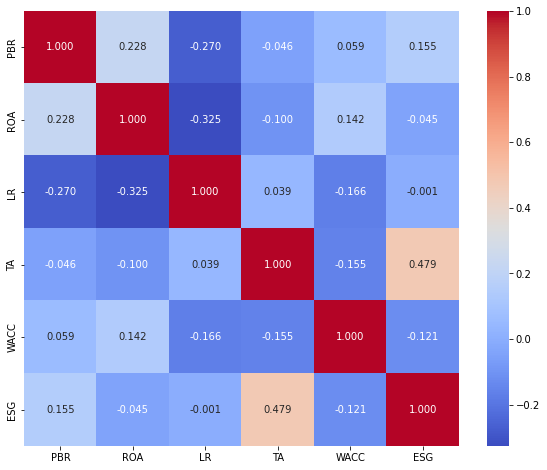

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = mi_data2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='coolwarm',
            square=True, ax=ax, annot=True, fmt = '.3f')

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = mi_data2.corr().round(2)
pval = mi_data2.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.astype(str) + p

,PBR,ROA,LR,TA,WACC,ESG
PBR,1.0***,0.23***,-0.27***,-0.05,0.06,0.15***
ROA,0.23***,1.0***,-0.33***,-0.1**,0.14***,-0.05
LR,-0.27***,-0.33***,1.0***,0.04,-0.17***,-0.0
TA,-0.05,-0.1**,0.04,1.0***,-0.15***,0.48***
WACC,0.06,0.14***,-0.17***,-0.15***,1.0***,-0.12***
ESG,0.15***,-0.05,-0.0,0.48***,-0.12***,1.0***


In [ ]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(mi_data2)

,PBR,ROA,LR,TA,WACC,ESG
PBR,0.000,0.000,0.000,0.261,0.148,0.000
ROA,0.000,0.000,0.000,0.014,0.000,0.266
LR,0.000,0.000,0.000,0.340,0.000,0.981
TA,0.261,0.014,0.340,0.000,0.000,0.000
WACC,0.148,0.000,0.000,0.000,0.000,0.003
ESG,0.000,0.266,0.981,0.000,0.003,0.000


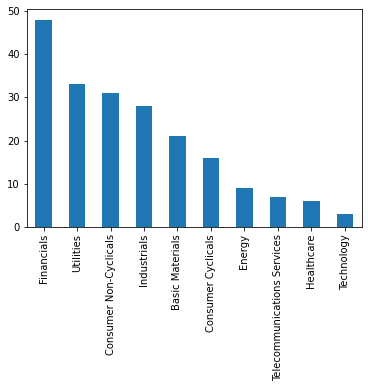

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mi_data4['Sector'].value_counts().plot(ax=ax, kind='bar')

Text(0.5, 0, 'Frequency')

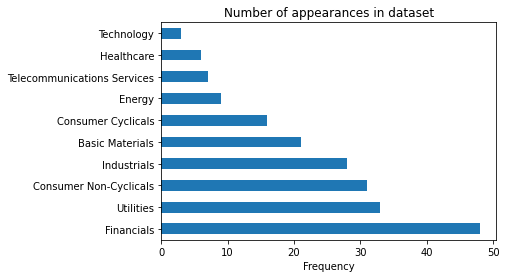

In [ ]:
import matplotlib.pyplot as plt

#import your data here

#Plot a histogram of frequencies
mi_data4.Sector.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

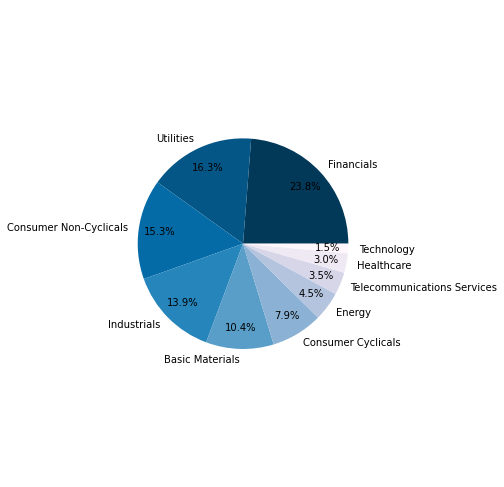

In [ ]:
mi_data4.Sector.value_counts().plot(kind='pie',figsize=(7, 7), subplots=True,autopct='%1.1f%%', cmap="PuBu_r", pctdistance=0.8
                                    )
labels=mi_data4.Sector.unique()
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
#plt.title('Number of appearances in dataset')

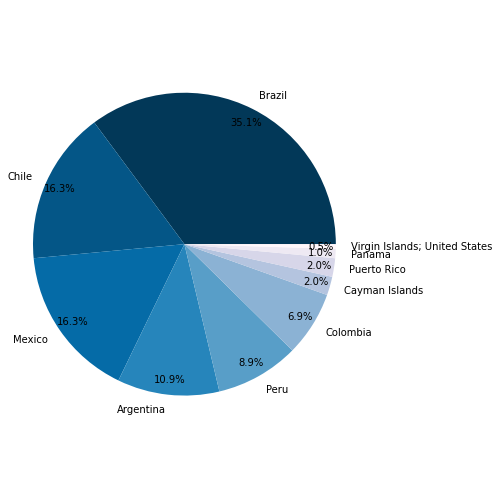

In [ ]:
mi_data4.Country.value_counts().plot(kind='pie',figsize=(7, 7), subplots=True,autopct='%1.1f%%', cmap="PuBu_r",pctdistance=0.9)
labels=mi_data4.Sector.unique()
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
#plt.title('Number of appearances in dataset')

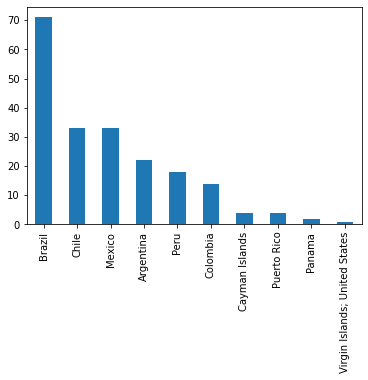

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mi_data4['Country'].value_counts().plot(ax=ax, kind='bar')

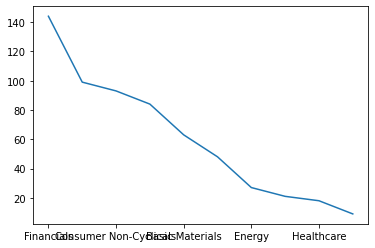

In [ ]:
fig, ax = plt.subplots()
mi_data2['Sector'].value_counts().plot(ax=ax)

In [ ]:
###Breusch-Pagan Test###

import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

mi_databp = mi_data2.drop(columns=['Year']).reset_index()
#fit regression model
fit = smf.ols('WACC ~ PBR+ROA+LR+TA+ESG', data=mi_databp).fit()


#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 18.18550531035375),
 ('p-value', 0.002722678680694354),
 ('f-value', 3.7124988528815286),
 ('f p-value', 0.002563649180198546)]

In [ ]:
###Breusch-Pagan Test
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as rg
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as dg

ivar = ['PBR', 'ROA', 'LR', 'TA', 'ESG']
reg = rg.OLS(mi_databp['WACC'], mi_databp[ivar]).fit()
res = reg.resid

print('== Residuals Homoscedasticity Breusch-Pagan Test ==')
print('')
print('Breusch-Pagan LM Test Statistic:', np.round(dg.het_breuschpagan(res, exog_het=mi_databp[ivar])[0], 6))
print('Breusch-Pagan LM Test P-Value:', np.round(dg.het_breuschpagan(res, exog_het=mi_databp[ivar])[1], 6))

== Residuals Homoscedasticity Breusch-Pagan Test ==

Breusch-Pagan LM Test Statistic: 72.196556
Breusch-Pagan LM Test P-Value: 0.0


In [ ]:
#HAUSSMAN TEST 2
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels import PooledOLS
import statsmodels.api as sm

endog = mi_data2['WACC']

# random effects model
exog_vars = mi_data2[['PBR','ROA','LR','TA','ESG']]##,'Sector','Year']]
exog = sm.add_constant(exog_vars)

model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 

# fixed effects model
exog_vars2 = mi_data2[['PBR','ROA','LR','TA','ESG']]
exog2 = sm.add_constant(exog_vars2)

model_fe = PanelOLS(endog, exog2, entity_effects = True, time_effects=True) 
fe_res = model_fe.fit() 


#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   WACC   R-squared:                        0.0955
Estimator:              RandomEffects   R-squared (Between):             -0.1192
No. Observations:                 606   R-squared (Within):               0.1781
Date:                Sun, Mar 13 2022   R-squared (Overall):             -0.0438
Time:                        20:04:21   Log-likelihood                    1306.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      12.676
Entities:                         202   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                   F(5,600)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             12.676
                            

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

def hausman(fe, re):
  b = fe.params
  B = re.params
  v_b = fe.cov
  v_B = re.cov

  df = b[np.abs(b) < 1e8].size
  chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

  pval = stats.chi2.sf(chi2, df)
  return chi2, df, pval

hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 54.531123820884325
degrees of freedom: 6
p-Value: 5.764284595771045e-10


In [ ]:
#mi_data2.index.values.tolist()  

In [ ]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels import BetweenOLS, FirstDifferenceOLS, PooledOLS
import statsmodels.api as sm

In [ ]:
exog_vars = mi_data2[['PBR','ROA','LR','TA','ESG','Sector','Year']]
exog = sm.add_constant(exog_vars)

In [ ]:
RE = RandomEffects(mi_data2.WACC, exog )
robustRE = RE.fit(cov_type='robust')
print(robustRE)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   WACC   R-squared:                        0.2623
Estimator:              RandomEffects   R-squared (Between):              0.0165
No. Observations:                 606   R-squared (Within):               0.3454
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.0998
Time:                        18:07:14   Log-likelihood                    1378.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      13.086
Entities:                         202   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                  F(16,589)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             9.4404
                            

In [ ]:
###TEST DE HAUSMAN (https://python.quantecon.org/ols.html) ()
##The Hausman Test (also called the Hausman specification test) detects endogenous regressors (predictor variables) in a regression model. 
##Endogenous variables have values that are determined by other variables in the system.

##We want to test for correlation between the endogenous variables and the errors
mi_data4=mi_data2.copy()
##First we regress
#reg1 = PanelOLS(mi_data4.WACC,exog).fit(cov_type='clustered')

##First we regress
mi_data4['resid'] = robustRE.resids

exog_vars3 = mi_data4[['PBR','LR','TA','ESG','Sector','Year', 'resid']]
exog3 = sm.add_constant(exog_vars3)

reg2=PanelOLS(mi_data4.WACC,exog3).fit(cov_type='clustered')

#There is a correlation between the unique errors and the regressors in the model, that's why the null hypothesis in rejected

print(reg2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   WACC   R-squared:                        0.8061
Estimator:                   PanelOLS   R-squared (Between):              0.8221
No. Observations:                 606   R-squared (Within):               0.7591
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.8061
Time:                        18:07:47   Log-likelihood                    1455.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      153.06
Entities:                         202   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                  F(16,589)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             130.65
                            

In [ ]:
POLS = PooledOLS(mi_data2.WACC, exog)
robustPOLS = POLS.fit(cov_type='robust')
print(robustPOLS)

                          PooledOLS Estimation Summary                          
Dep. Variable:                   WACC   R-squared:                        0.1723
Estimator:                  PooledOLS   R-squared (Between):              0.1493
No. Observations:                 606   R-squared (Within):               0.2402
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.1723
Time:                        18:07:49   Log-likelihood                    1016.0
Cov. Estimator:                Robust                                           
                                        F-statistic:                      7.6633
Entities:                         202   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                  F(16,589)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             6.3280
                            

In [ ]:
exog_vars = mi_data2[['PBR','ROA','LR','TA','ESG','Year']]
exog = sm.add_constant(exog_vars)

FDOLS = FirstDifferenceOLS(mi_data2.WACC, exog_vars)
FDOLSrobust = FDOLS.fit(cov_type='robust')
print(FDOLSrobust)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                   WACC   R-squared:                        0.4867
Estimator:         FirstDifferenceOLS   R-squared (Between):             -1.7115
No. Observations:                 404   R-squared (Within):               0.3790
Date:                Sun, Mar 13 2022   R-squared (Overall):             -1.5859
Time:                        18:07:51   Log-likelihood                    779.67
Cov. Estimator:                Robust                                           
                                        F-statistic:                      53.782
Entities:                         202   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                   F(7,397)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             35.111
                            

In [ ]:
exog_vars2 = mi_data2[['PBR','ROA','LR','TA','ESG']]
exog2 = sm.add_constant(exog_vars2)

FEMOD=PanelOLS(mi_data2.WACC,exog2,entity_effects=True, time_effects=True)
FEMOD=FEMOD.fit(cov_type='clustered', cluster_entity=True)
print(FEMOD)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   WACC   R-squared:                        0.2080
Estimator:                   PanelOLS   R-squared (Between):             -0.8893
No. Observations:                 606   R-squared (Within):               0.2708
Date:                Sun, Mar 13 2022   R-squared (Overall):             -0.5953
Time:                        18:07:53   Log-likelihood                    1530.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      20.847
Entities:                         202   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                   F(5,397)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             6.4799
                            

In [ ]:
exog_vars2 = mi_data2[['PBR','ROA','LR', 'TA','ESG']]
exog2 = sm.add_constant(exog_vars2)
#,'CR','TA','ESG'
FETMOD=PanelOLS(mi_data2.WACC,exog2,entity_effects=True,time_effects=True)
FETMOD=FETMOD.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(FETMOD)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   WACC   R-squared:                        0.2080
Estimator:                   PanelOLS   R-squared (Between):             -0.8893
No. Observations:                 606   R-squared (Within):               0.2708
Date:                Sun, Mar 13 2022   R-squared (Overall):             -0.5953
Time:                        18:07:55   Log-likelihood                    1530.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      20.847
Entities:                         202   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                   F(5,397)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             8.5562
                            